#### toy grover search
&nbsp; &nbsp; &nbsp; following Nielsen-Chuang ( chapter 6.1 ) and Hidary ( chapter 8.6 )

In [1]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def int2bit( n, k ): # the binary expansion of n, as a list of k bits
    assert 0 <= n < 2 ** k
    b = [ 0 if b == '0' else 1 for b in bin( n )[ 2 : ] ]
    return ( k - len( b ) ) * [ 0 ] + b

In [3]:
def bit2int( b ):
    n = sum( [ bn * 2 ** n for n, bn in enumerate( reversed( b ) ) ] )
    return n

In [4]:
def reflection_gate( q ):
    R = [ cirq.Z.controlled( len( q ) - 1 ).on( * q ) ]
    return R

In [5]:
def oracle_gates( q, m ): # the oracle sends |m> to -|m>, fixing the other |n>'s
    b = int2bit( m, len( q ) ) # bits of m
    Xs = [ cirq.X( qn ) for qn, bn in zip( q, b ) if bn == 0 ]
    R = reflection_gate( q )
    return Xs + R + Xs

In [6]:
def diffusion_gates( q ):
    Hs = [ cirq.H.on_each( q ) ]
    Xs = [ cirq.X.on_each( q ) ]
    R = reflection_gate( q )
    return Hs + Xs + R + Xs + Hs

In [7]:
def grover_gates( q, oracle, diffuser, size ):
    Hs = [ cirq.H.on_each( q ) ]
    rotations = size * ( oracle + diffuser ) # two reflections make a rotation
    measurements = [ cirq.measure( qn, key = str( n ) ) for n, qn in enumerate( q ) ]
    return Hs + rotations + measurements

In [14]:
def simulate( q, circuit, times ):
    result = cirq.Simulator( ).run( program = circuit, repetitions = times )
    result = [ result.measurements[ str( n ) ] for n in range( len( q ) ) ]
    return np.array( result ).squeeze( )

In [15]:
def interpret( result ):
    measurement = [ bit2int( b ) for b in result.T ]
    probability = np.zeros( 2 ** len( result ), dtype = 'float' )
    for n in measurement : probability[ n ] += 1 / len( measurement )
    return measurement, probability

In [16]:
def plot( dimension, probability ):
    fig, axis = plt.subplots( figsize = ( 14, 5 ), facecolor = 'white' )
    axis.set_xlabel( 'measurement', size = '12' )
    axis.set_ylabel( 'probability', size = '12' )
    axis.plot( dimension, probability, color = 'black', marker = '.', linestyle = 'None' )
    plt.show( )

In [17]:
def display( circuit, result, size, m ):
    [ k, times ] = result.shape
    sqrt = int( 3.14 / 4 * 2 ** ( k / 2 ) ) # circuit complexity O( sqrt( 2 ** k ) )
    print( 'grover circuit simulation\n' )
    print( f'qubits        { k }' )
    print( f'optimal size  { sqrt } rotations' )
    print( f'actual  size  { size } rotations' )
    print( f'looking for   { m } among the numbers { 0 }, { 1 }, ..., { 2 ** k - 1 }\n' )
    measurement, probability = interpret( result )
    if times < 300 : print( f'measurements\n{ measurement }' )
    if k < 20 : plot( range( 2 ** k ), probability )
    if size <  4 : print( f'\ncircuit diagram\n{ circuit }' ) 

grover circuit simulation

qubits        8
optimal size  12 rotations
actual  size  7 rotations
looking for   6 among the numbers 0, 1, ..., 255

measurements
[6, 6, 188, 6, 6, 6, 6, 128, 61, 6, 6, 6, 6, 6, 6, 6, 6, 28, 6, 146, 6, 6, 188, 6, 6, 172, 6, 39, 6, 77, 6, 6, 6, 6, 59, 6, 6, 6, 6, 6, 6, 6, 37, 6, 163, 226, 23, 6, 129, 6, 6, 77, 6, 47, 6, 6, 6, 126, 248, 65, 6, 6, 6, 14, 6, 6, 6, 6, 6, 6, 6, 6, 6, 232, 6, 6, 115, 184, 109, 6, 6, 6, 6, 6, 6, 6, 6, 6, 74, 152, 68, 6, 6, 6, 57, 6, 178, 6, 6, 68]


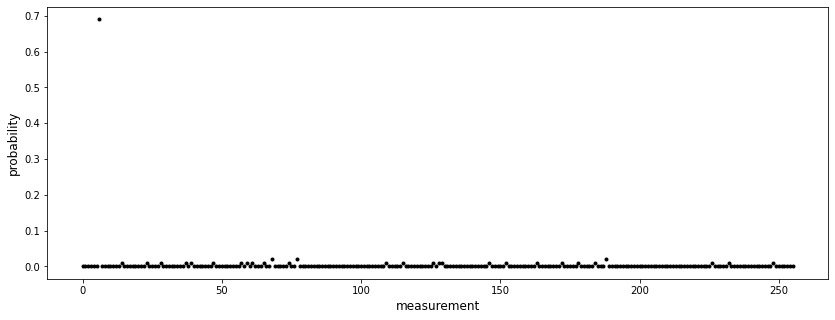

In [18]:
m = 6 # is the number that we hope to measure at the end of the circuit
k = 8 # is the number of qubits in the circuit
size = 7 # is the number of rotations in the circuit
times = 100 # is the number of circuit simulations

q = cirq.LineQubit.range( k )
oracle = oracle_gates( q, m )
diffuser = diffusion_gates( q )
grover = cirq.Circuit( grover_gates( q, oracle, diffuser, size ) )
result = simulate( q, grover, times )
display( grover, result, size, m )

grover circuit simulation

qubits        16
optimal size  200 rotations
actual  size  100 rotations
looking for   55555 among the numbers 0, 1, ..., 65535

measurements
[568, 31711, 55555, 55555, 29434, 22692, 55555, 55555, 55555, 20187, 52613, 63739, 55555, 27386, 55555, 55555, 37273, 41873, 14125, 17547, 55555, 55938, 87, 55555, 62051, 59936, 24752, 11524, 55555, 55555, 55555, 55555, 55555, 55555, 25099, 5004, 28673, 5169, 55555, 60833, 55555, 55555, 55555, 23892, 55555, 2617, 55555, 55555, 55555, 55555, 55555, 25984, 49354, 55555, 40432, 55555, 55555, 65373, 41209, 55555, 55555, 65162, 55555, 12554, 3640, 1932, 55555, 8526, 21353, 55555, 55555, 55555, 42719, 55555, 55555, 63061, 5631, 55555, 55555, 59254, 55555, 55555, 55555, 55555, 8651, 34852, 55555, 22543, 55555, 43582, 8863, 55555, 40655, 55555, 55555, 61826, 58469, 55555, 64999, 55555]


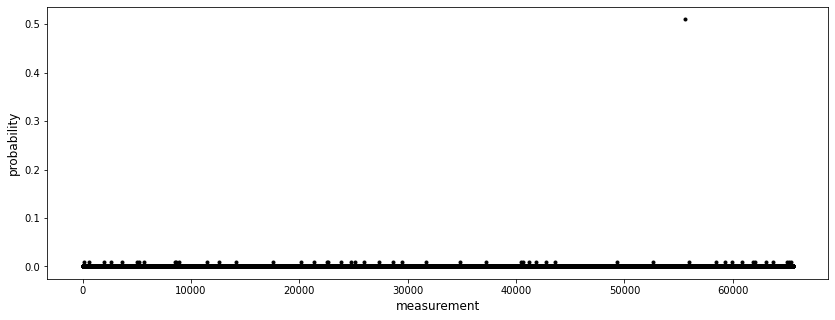

In [19]:
m = 55555
k = 16
size = 100
times = 100

q = cirq.LineQubit.range( k )
oracle = oracle_gates( q, m )
diffuser = diffusion_gates( q )
grover = cirq.Circuit( grover_gates( q, oracle, diffuser, size ) )
result = simulate( q, grover, times )
display( grover, result, size, m )